In [1]:
%load_ext autoreload
%autoreload 1
%aimport bmxobs

In [2]:
d = bmxobs.BMXObs("200312_1732_yale","all_auto") ## specify what to load, we say all auto channels
d.diode_buf_samp = 1

In [3]:
# I can do stuff like
print(dir(d))
len(d), d.mjd, d.ra

['N', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_load_aux', '_load_data', 'bgal', 'cache_clear', 'd110', 'd111', 'd220', 'd221', 'd330', 'd331', 'd440', 'd441', 'd550', 'd551', 'd660', 'd661', 'd770', 'd771', 'd880', 'd881', 'data', 'dec', 'diode', 'diode_buf_samp', 'diode_pulses', 'freq', 'freq0', 'freq1', 'iwires', 'lgal', 'meta', 'mjd', 'nchan', 'ncuts', 'process_diode', 'ra', 'remove_diode_pulses', 'root', 'root_dir', 'stage', 'tags', 'wires']


(61069,
 array([58920.73062828, 58920.73062864, 58920.73062899, ...,
        58920.75218799, 58920.75218835, 58920.7521887 ]),
 array([0.01285033, 0.01285255, 0.01285478, ..., 0.14845562, 0.14845784,
        0.14846006], dtype=float32))

1 0


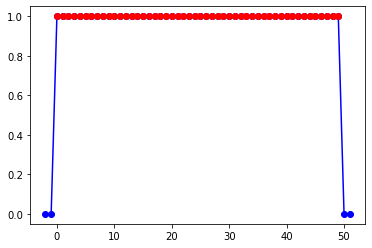

In [4]:
a,b = d.diode_pulses()[10]
plt.plot(np.arange(-2,52),d.diode[a-2:b+2],'bo-')
plt.plot(np.arange(50),d.diode[a:b],'ro-')
print (d.diode[a],d.diode[b])

In [5]:
d.process_diode()

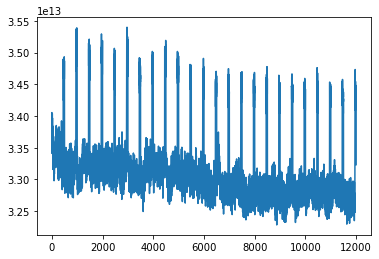

In [6]:
## Look at some data
plt.plot(d[880][3000:15000,90])

50


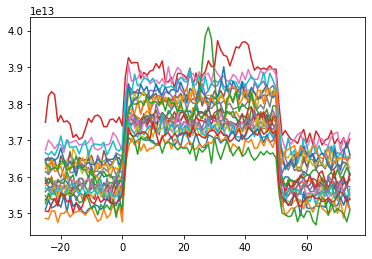

In [7]:
w=220
t1,t2=d.diode_pulses()[1]
K=t2-t1
print(K)
x=np.zeros((K+50,len(d.freq[0])))
a=np.zeros((K+50,))
for i,j in d.diode_pulses():
    if (i>3000) and (i<15000):
        plt.plot(range(-25,75),d[w][i-25:j+25,100])
        x+=d[w][i-25:j+25,:]


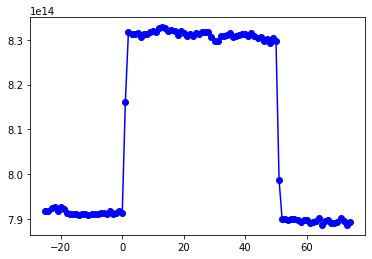

In [8]:
plt.plot(range(-25,75),x[:,108:114].mean(axis=1),'bo-')

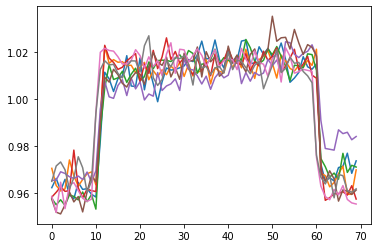

In [9]:
a,b = d.diode_pulses()[10]
for i in range(8):
    tp=d[110*(i+1)][a-10:b+10,100]
    plt.plot(tp/tp.mean())

In [10]:
%autoreload
fdata = d.remove_diode_pulses(to_self=False)

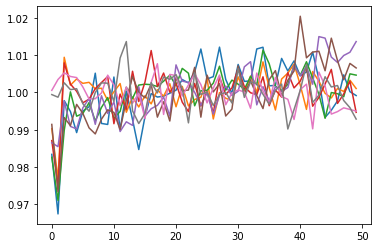

In [11]:


for i in range(8):
    tp=fdata[110*(i+1)][a:b,100]
    plt.plot(tp/tp.mean())

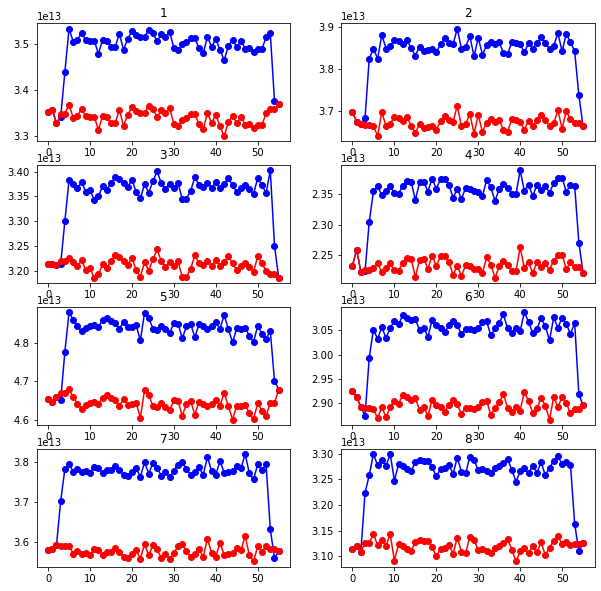

In [12]:
%autoreload
a,b = d.diode_pulses()[14]
d.cache_clear()
d.diode_buf_samp = 2
fdata = d.remove_diode_pulses(to_self=False)
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(d[110*(i+1)][a-3:b+3,100],'bo-')
    plt.plot(fdata[110*(i+1)][a-3:b+3,100],'ro-')
    plt.title(i+1)


50


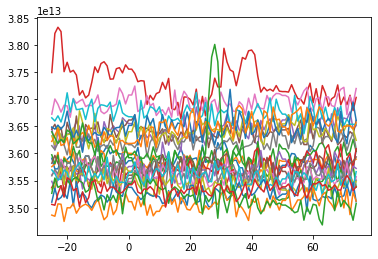

In [13]:
w=220
t1,t2=d.diode_pulses()[1]
K=t2-t1
print(K)
x=np.zeros((K+50,len(d.freq[0])))
a=np.zeros((K+50,))
for i,j in d.diode_pulses():
    if (i>3000) and (i<15000):
        plt.plot(range(-25,75),fdata[w][i-25:j+25,100])
        x+=fdata[w][i-25:j+25,:]


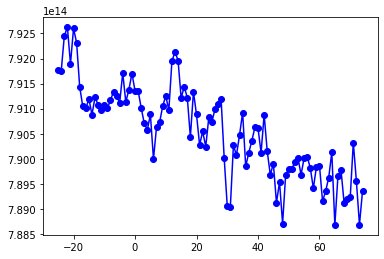

In [14]:
plt.plot(range(-25,75),x[:,108:114].mean(axis=1),'bo-')